 - Timestamp was generated at generator 
 - Keyed Field was generated sequentially rather than random  
 - No Warmup  


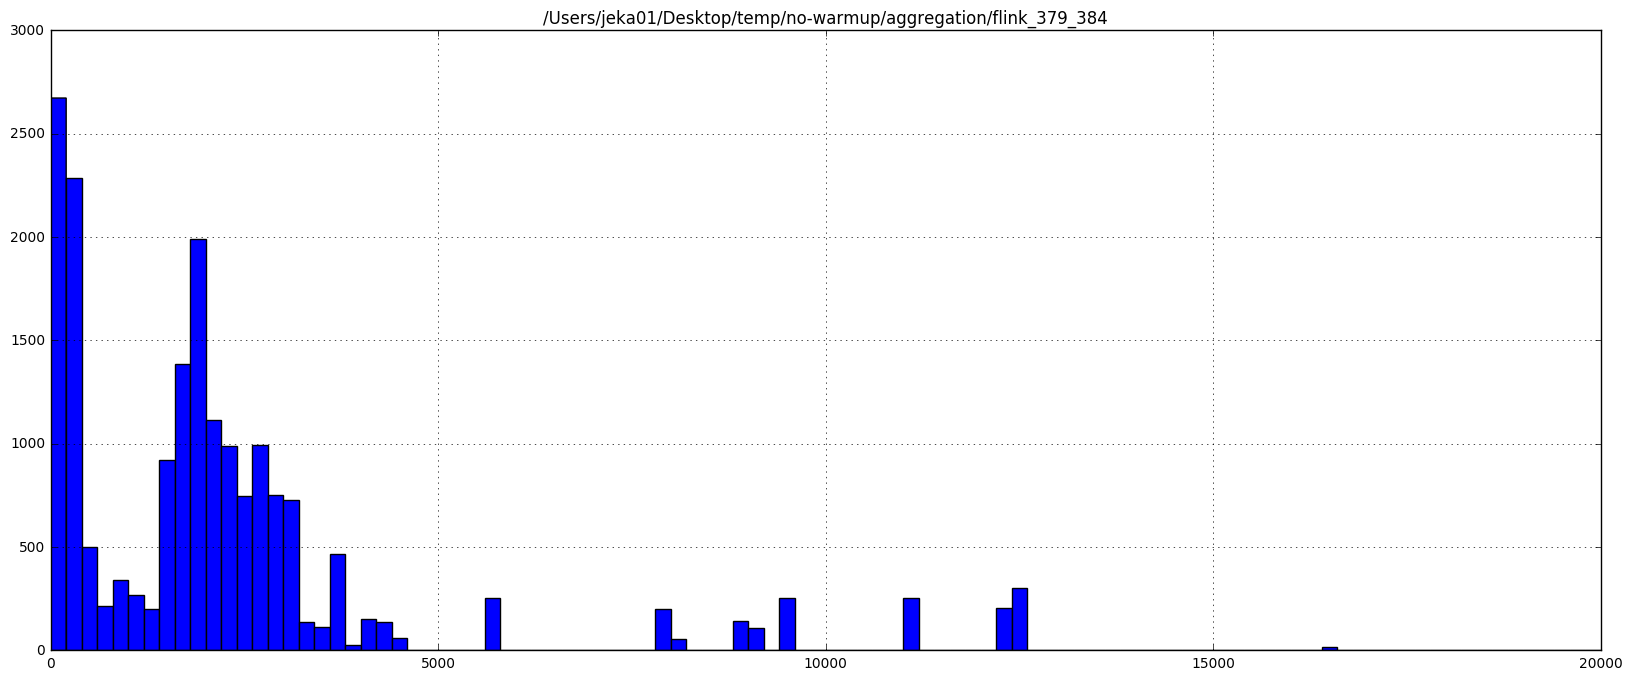

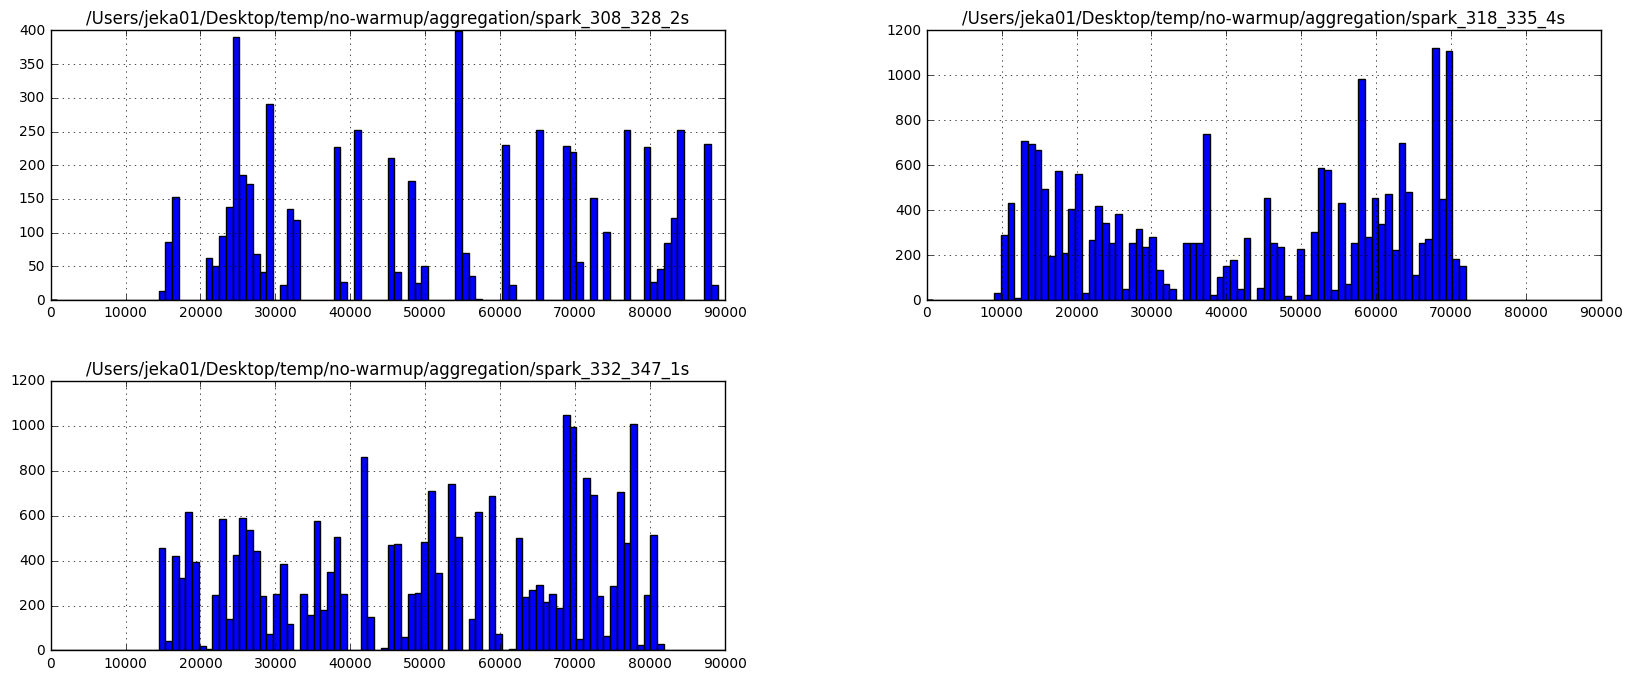

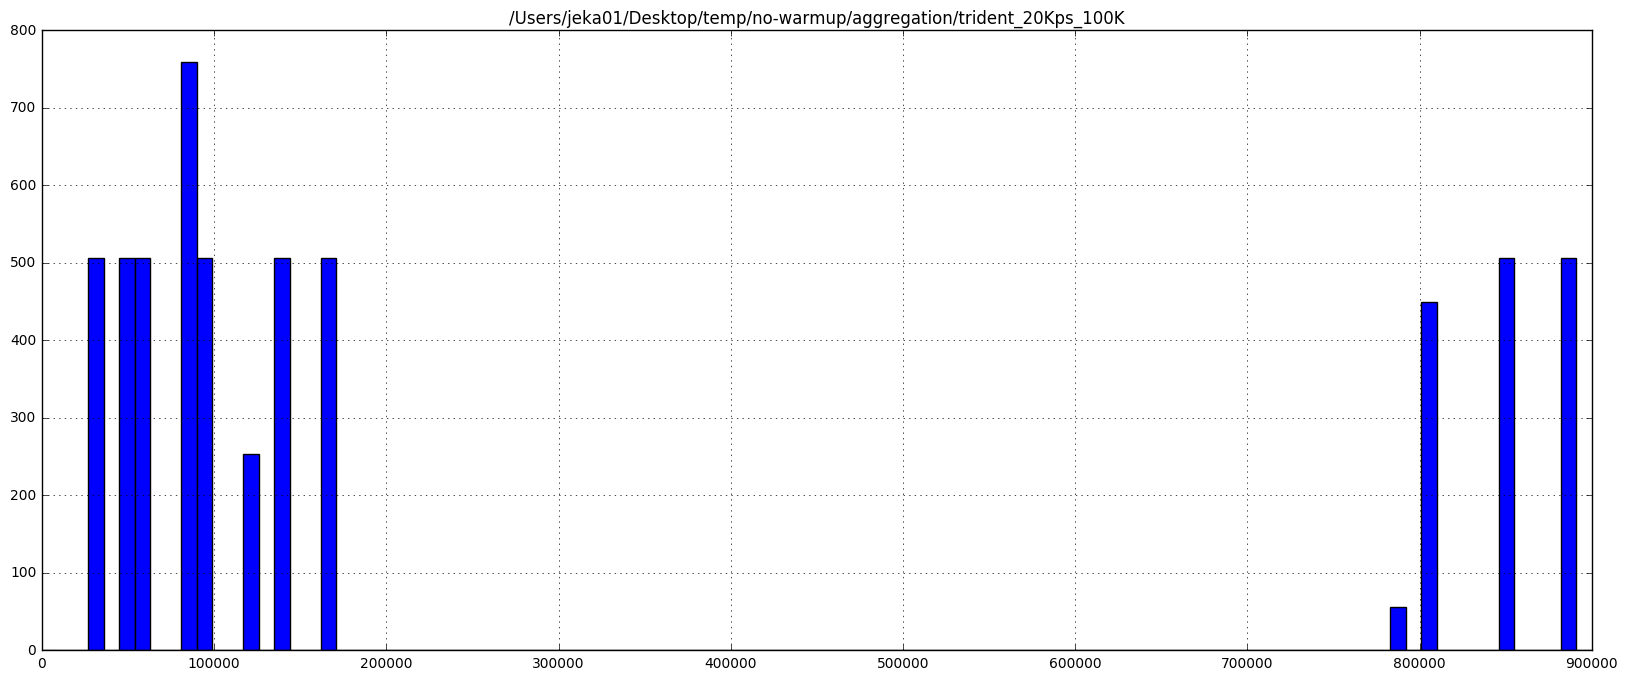

In [28]:
## from pandas import DataFrame, read_csv

# General syntax to import a library but no functions:
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import glob
import numpy as np
# def combineFiles( inputDir,outputFile ):
#     read_files = glob.glob(inputDir)
#     with open(outputFile, "wb") as outfile:
#         for f in read_files:
#             with open(f, "rb") as infile:
#                 outfile.write(infile.read())
#     return




def prunDataFrame(dataframe):
    dataframe = dataframe.drop('geo', 1)
    dataframe = dataframe.drop('mx', 1)
    dataframe = dataframe.drop('mn', 1)
    dataframe = dataframe[['latency','wc']].apply(pd.to_numeric,errors='coerce')
    dataframe = dataframe.dropna()
   # dataframe = dataframe.drop('window', 1)
    return dataframe

def buildDataFrame(filePath):
    df_temp = pd.read_csv(filePath,names=['geo','latency','mx','mn','wc'])
    df_temp = prunDataFrame(df_temp)
    return df_temp

def pruneForDenseWindows(dataframe,percentage):
    pd.to_numeric(dataframe.wc)
    topWindows = dataframe.wc.quantile(percentage)
    #print(topWindows)
    dataframe = dataframe[dataframe.wc > topWindows  ]
    return dataframe


def pandasDraw(listOfFilePaths,_figsize,_range,_quantile=None):
    for fileGroup in listOfFilePaths:
        df_list = []
        for file in fileGroup:
            column_name = file.rsplit('.', 1)[0]
            temp_df = buildDataFrame(file)
            if not (_quantile is None):
                temp_df = pruneForDenseWindows(temp_df,_quantile)
            temp_df_with_cols = pd.DataFrame({column_name:temp_df.latency},
                    columns=[column_name])
            df_list.append(temp_df_with_cols)
        df_final = pd.concat(df_list)
        ax_df_final = df_final.hist(figsize=_figsize,bins=100,range=_range)
    plt.show()
    








flink_379_384 = '/Users/jeka01/Desktop/temp/no-warmup/aggregation/flink_379_384.csv'

spark_332_347_1s = '/Users/jeka01/Desktop/temp/no-warmup/aggregation/spark_332_347_1s.csv'
spark_308_328_2s = '/Users/jeka01/Desktop/temp/no-warmup/aggregation/spark_308_328_2s.csv'
spark_318_335_4s = '/Users/jeka01/Desktop/temp/no-warmup/aggregation/spark_318_335_4s.csv'

trident_20Kps_100K = '/Users/jeka01/Desktop/temp/no-warmup/aggregation/trident_20Kps_100K.csv'


print (' - Timestamp was generated at generator ')
print (' - Keyed Field was generated sequentially rather than random  ')
print (' - No Warmup  ')


figsize = (20,8)
range = [0,20000]
pandasDraw([[flink_379_384]],
            _figsize=figsize,_range=range)

            
            
range = [0,90000]
pandasDraw([[spark_332_347_1s,spark_308_328_2s,spark_318_335_4s]],
           _figsize=figsize,_range=range)

range = [0,900000]
pandasDraw([[trident_20Kps_100K]],
           _figsize=figsize,_range=range)

 - Timestamp was generated at generator 
 - Keyed Field was generated sequentially rather than random  
 - No Warmup  
 - quantile  0.1


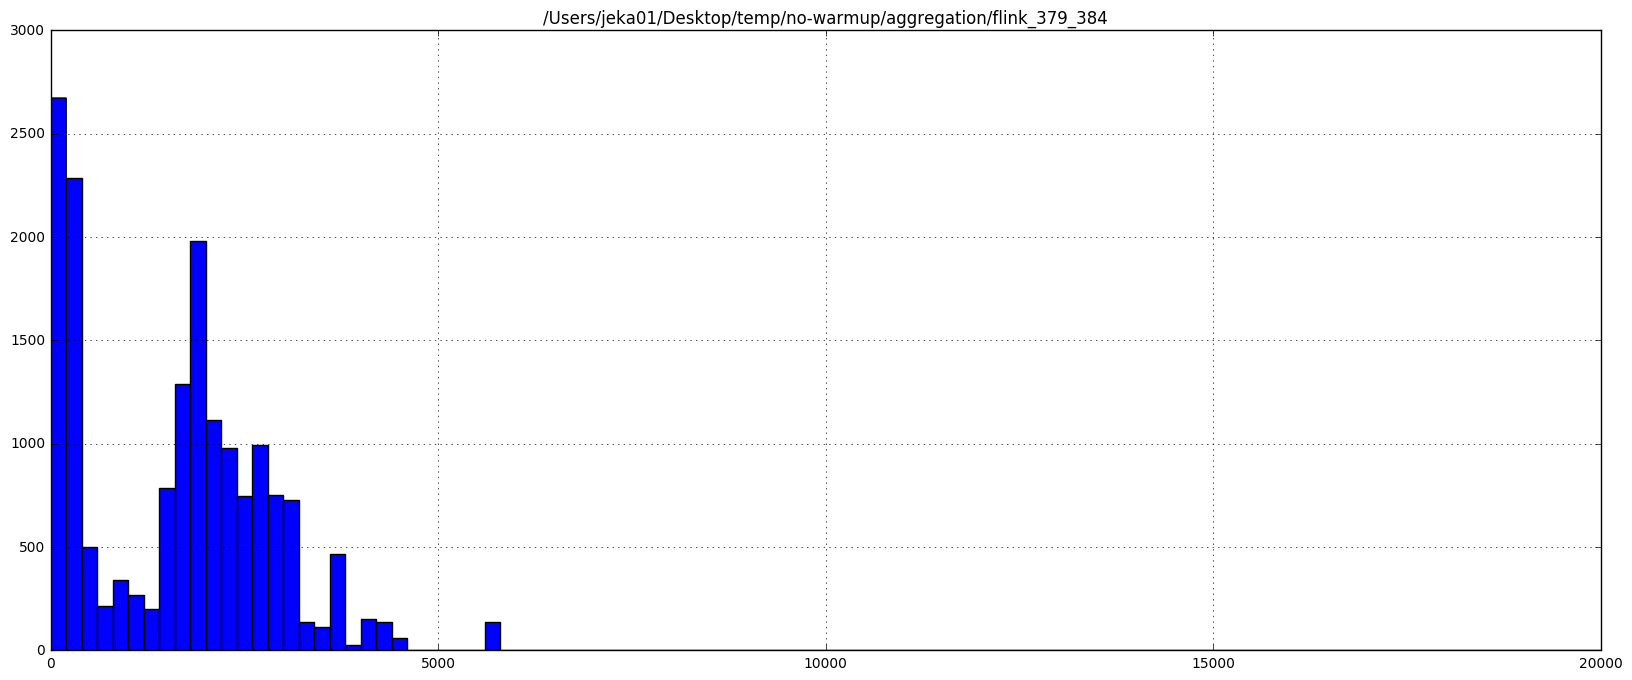

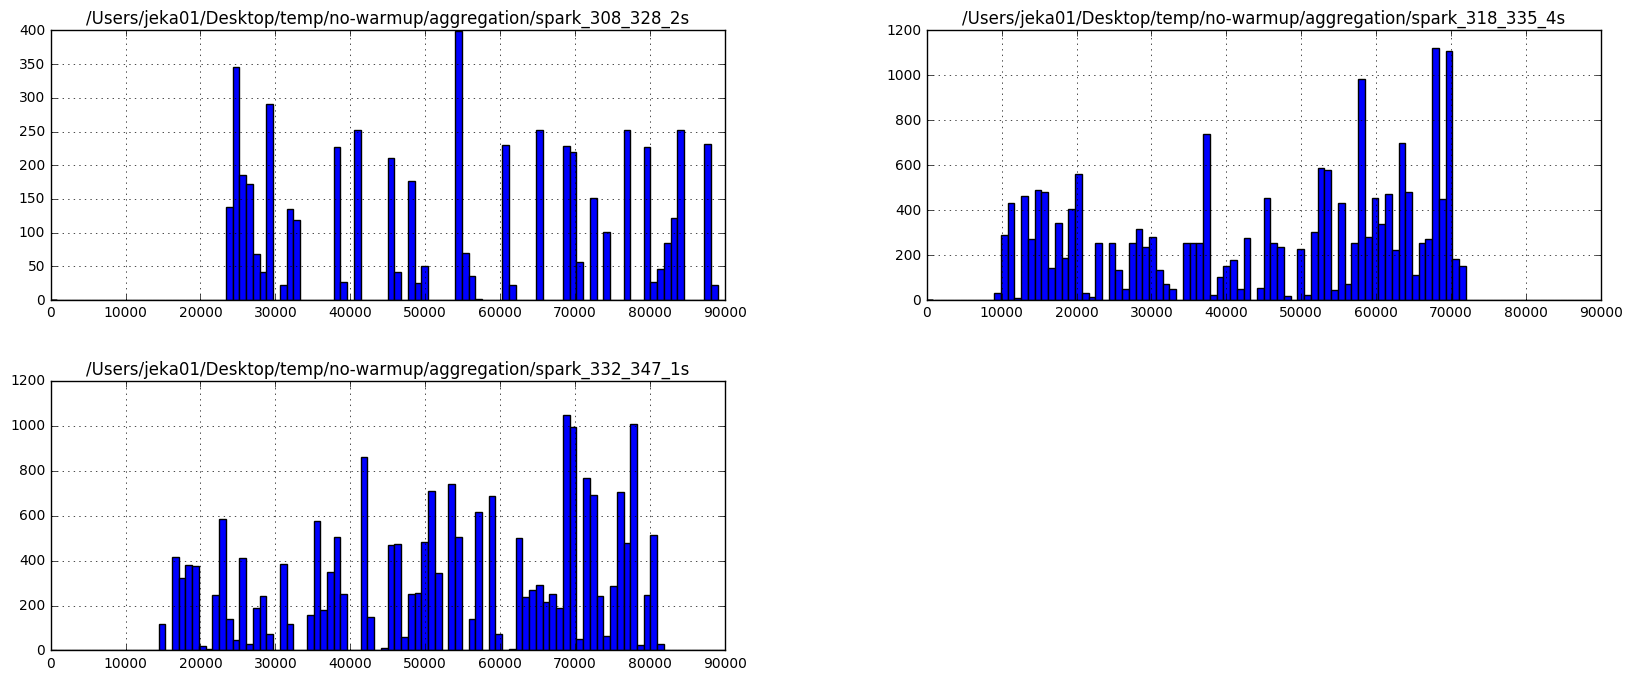

In [23]:
quant = 0.1

print (' - Timestamp was generated at generator ')
print (' - Keyed Field was generated sequentially rather than random  ')
print (' - No Warmup  ')
print (' - quantile  ' + str(quant))

range = [0,20000]
pandasDraw([[flink_379_384]],
            _figsize=figsize,_range=range,_quantile = quant)

range = [0,90000]
pandasDraw([[spark_332_347_1s,spark_308_328_2s,spark_318_335_4s]],
           _figsize=figsize,_range=range,_quantile = quant)



 - Timestamp was generated at generator 
 - Keyed Field was generated sequentially rather than random  
 - Yes Warmup  


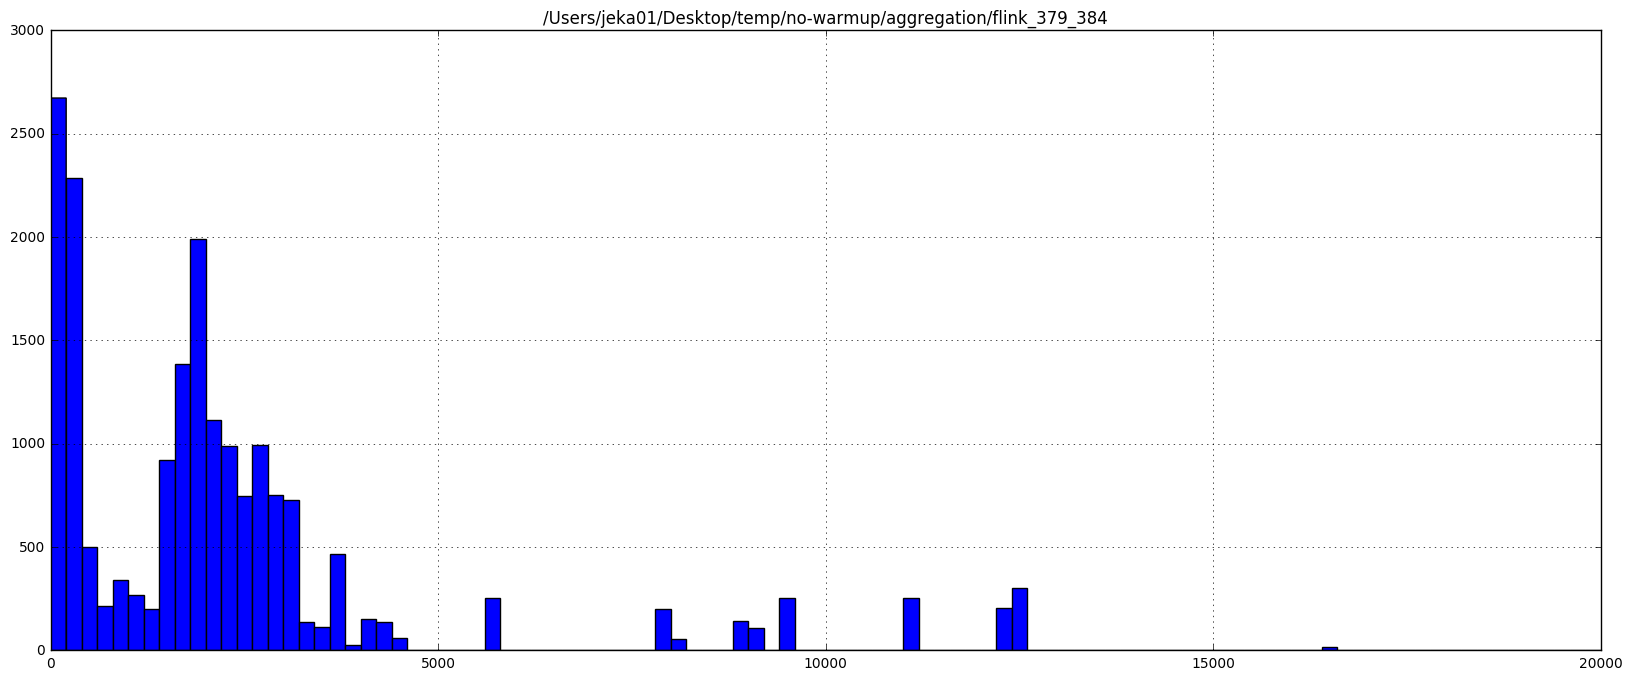

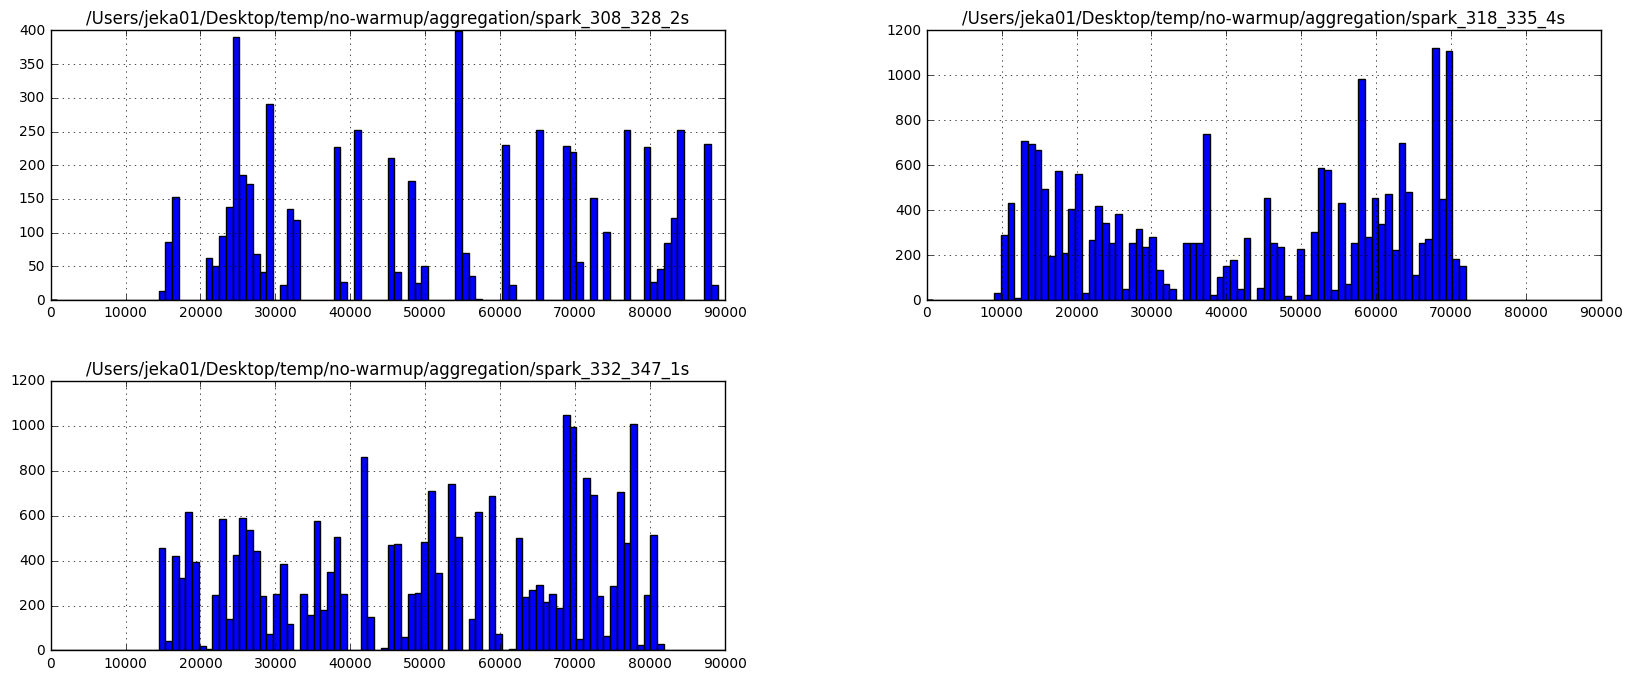

In [24]:
flink_378K_388K = '/Users/jeka01/Desktop/temp/yes-warmup/aggregation/flink_378K_388K.csv'

spark_343_363_2s = '/Users/jeka01/Desktop/temp/yes-warmup/aggregation/spark_343_363_2s.csv'
spark_326_346_4s = '/Users/jeka01/Desktop/temp/yes-warmup/aggregation/spark_326_346_4s.csv'
spark_329_352_1s = '/Users/jeka01/Desktop/temp/yes-warmup/aggregation/spark_329_352_1s.csv'


print (' - Timestamp was generated at generator ')
print (' - Keyed Field was generated sequentially rather than random  ')
print (' - Yes Warmup  ')


figsize = (20,8)
range = [0,20000]
pandasDraw([[flink_379_384]],
            _figsize=figsize,_range=range)

            
range = [0,90000]
pandasDraw([[spark_332_347_1s,spark_308_328_2s,spark_318_335_4s]],
           _figsize=figsize,_range=range)

 - Timestamp was generated at generator 
 - Keyed Field was generated sequentially rather than random  
 - Yes Warmup  
 - quantile  0.1


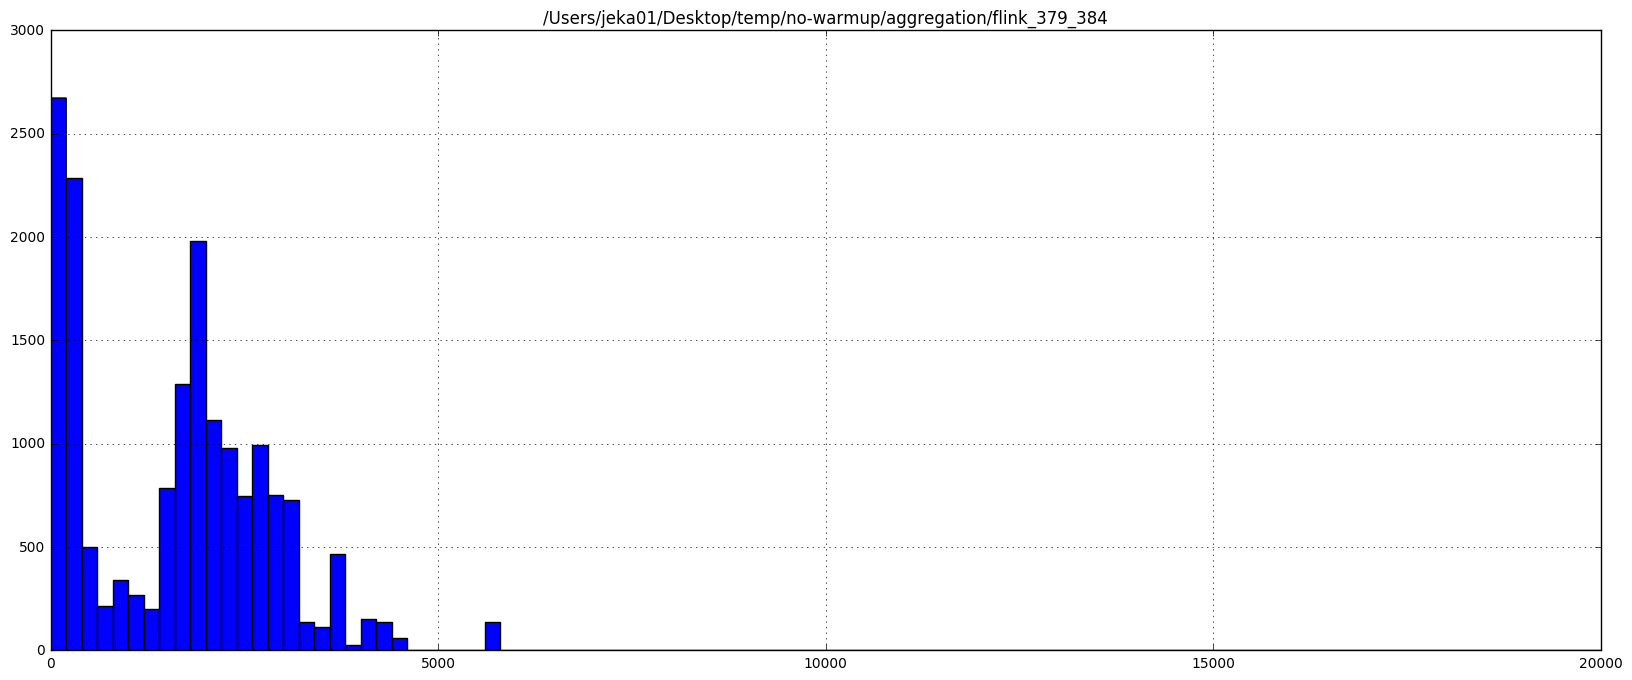

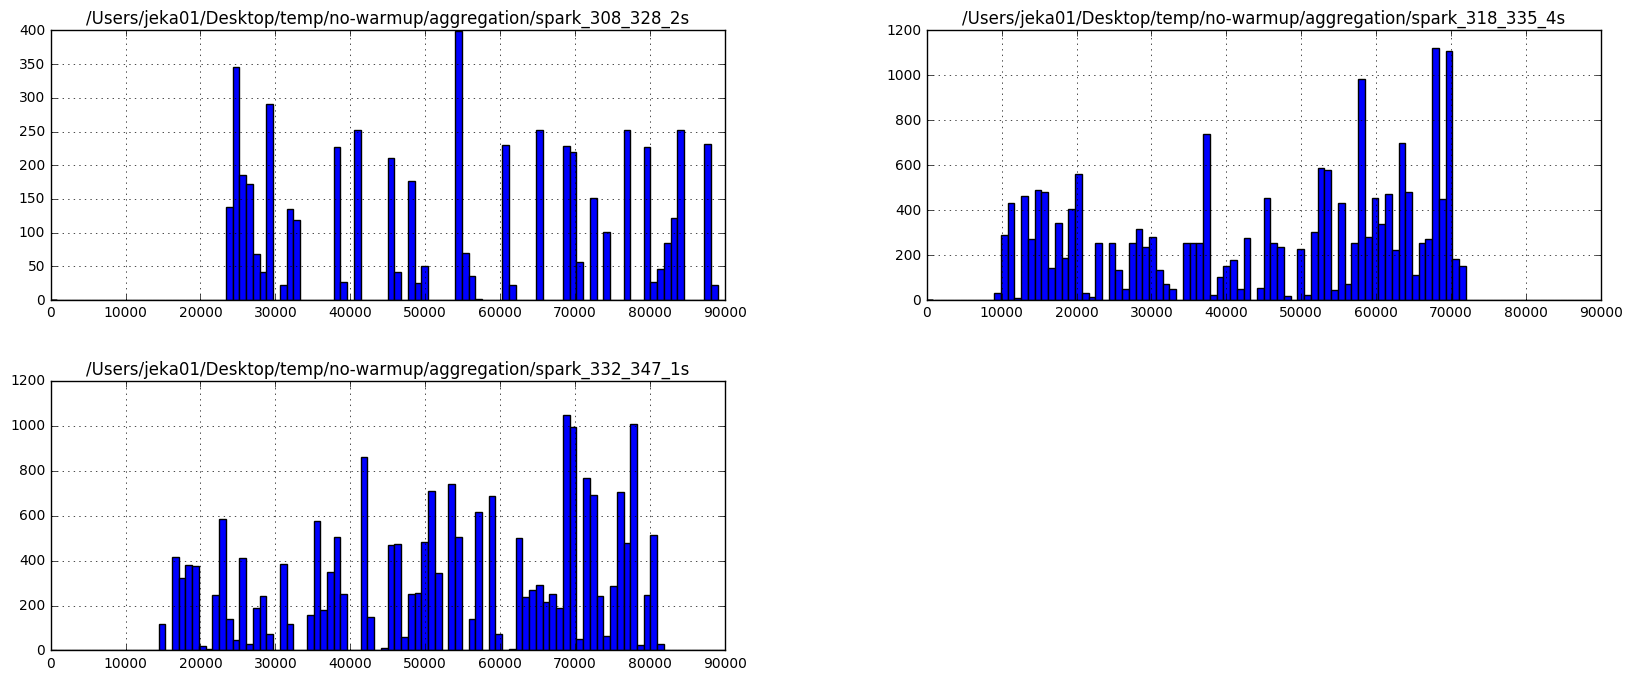

In [25]:
quant = 0.1


print (' - Timestamp was generated at generator ')
print (' - Keyed Field was generated sequentially rather than random  ')
print (' - Yes Warmup  ')
print (' - quantile  ' + str(quant))


figsize = (20,8)
range = [0,20000]
pandasDraw([[flink_379_384]],
            _figsize=figsize,_range=range,_quantile = quant)

            
range = [0,90000]
pandasDraw([[spark_332_347_1s,spark_308_328_2s,spark_318_335_4s]],
           _figsize=figsize,_range=range,_quantile = quant)

 - Timestamp was generated at generator 
 - Windowed Join  
 - Yes Warmup  


/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


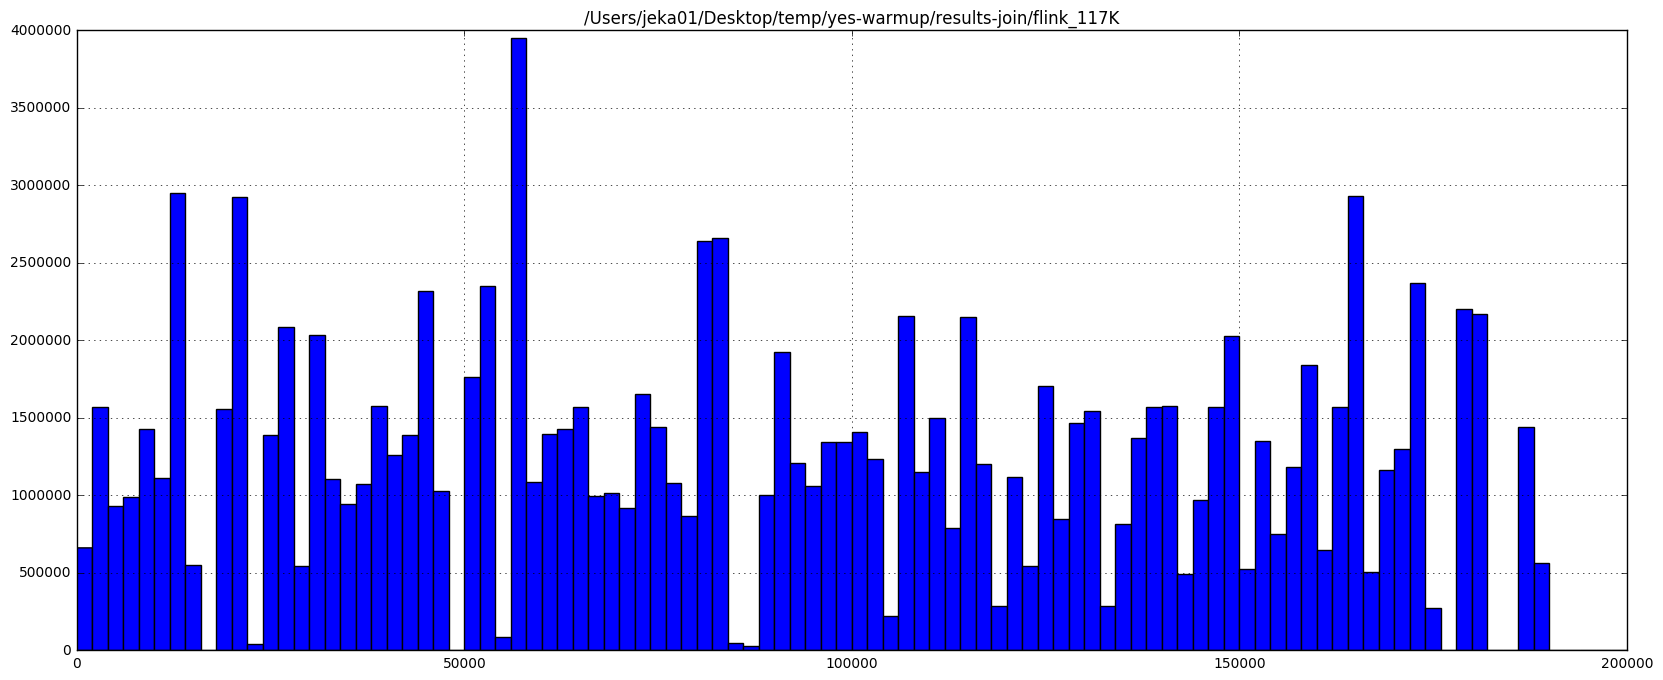

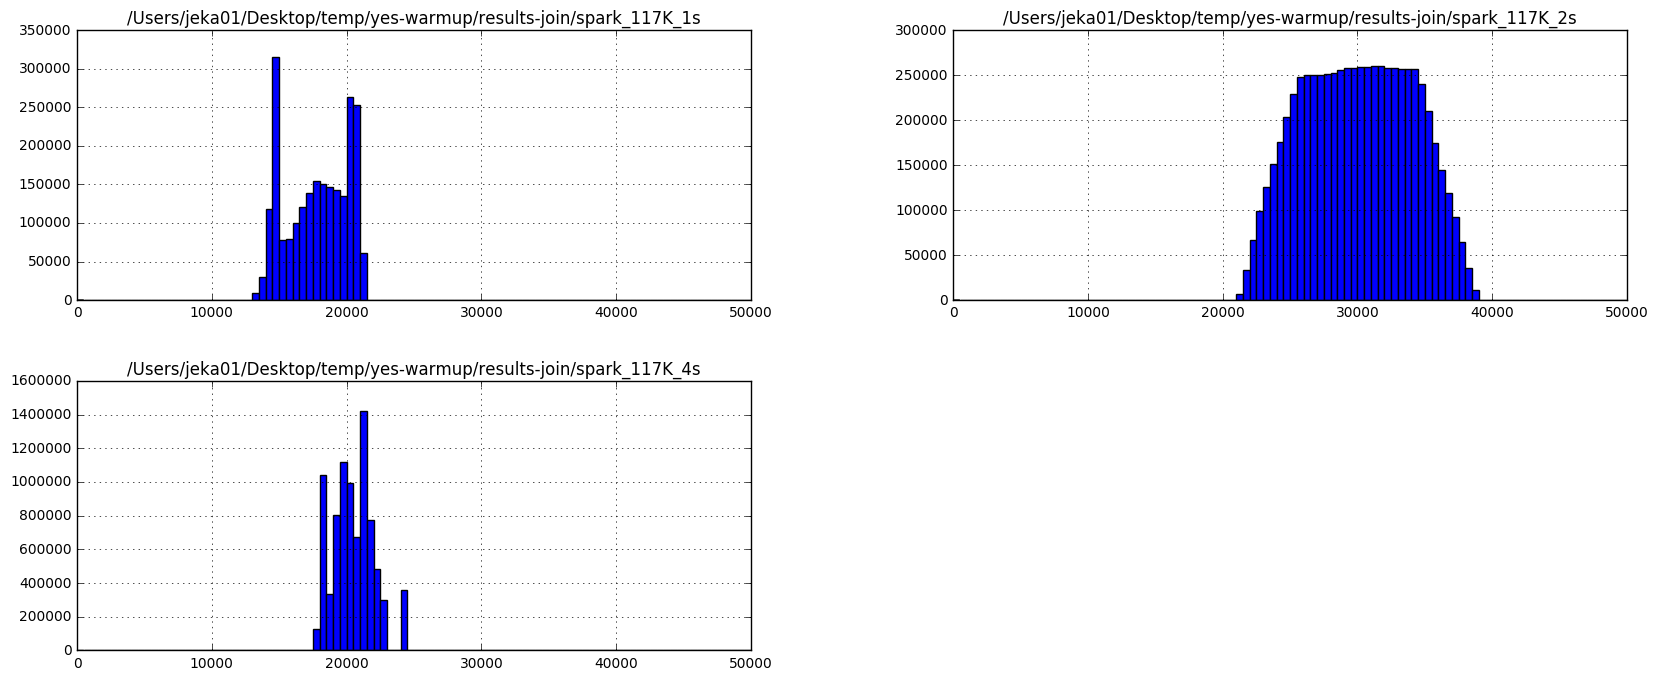

In [35]:
spark_117K_2s = '/Users/jeka01/Desktop/temp/yes-warmup/results-join/spark_117K_2s.csv'
spark_117K_1s = '/Users/jeka01/Desktop/temp/yes-warmup/results-join/spark_117K_1s.csv'
spark_117K_4s = '/Users/jeka01/Desktop/temp/yes-warmup/results-join/spark_117K_4s.csv'

flink_117K = '/Users/jeka01/Desktop/temp/yes-warmup/results-join/flink_117K.csv'
def prunDataFrame(dataframe):
    dataframe = dataframe.dropna()
    dataframe = dataframe.drop('geo', 1)
    dataframe = dataframe.drop('price', 1)
    dataframe = dataframe.apply(pd.to_numeric, errors='coerce')
    dataframe = dataframe.dropna()
    return dataframe


def buildDataFrame(filePath):
    df_temp = pd.read_csv(filePath,names=['geo','latency','price'])
    df_temp = prunDataFrame(df_temp)
    return df_temp

def pandasDraw(listOfFilePaths,_figsize,_range,_quantile=None):
    for fileGroup in listOfFilePaths:
        df_list = []
        for file in fileGroup:
            column_name = file.rsplit('.', 1)[0]
            temp_df = buildDataFrame(file)
            if not (_quantile is None):
                temp_df = pruneForDenseWindows(temp_df,_quantile)
            temp_df_with_cols = pd.DataFrame({column_name:temp_df.latency},
                    columns=[column_name])
            df_list.append(temp_df_with_cols)
        df_final = pd.concat(df_list)
        ax_df_final = df_final.hist(figsize=_figsize,bins=100,range=_range)
    plt.show()



print (' - Timestamp was generated at generator ')
print (' - Windowed Join  ')
print (' - Yes Warmup  ')


figsize = (20,8)
range = [0,200000]
pandasDraw([[flink_117K]],
            _figsize=figsize,_range=range)

range = [0,50000]
pandasDraw([[spark_117K_1s ,spark_117K_2s,spark_117K_4s]],
            _figsize=figsize,_range=range)




Flink windowed aggregation with 60K/sec data rate


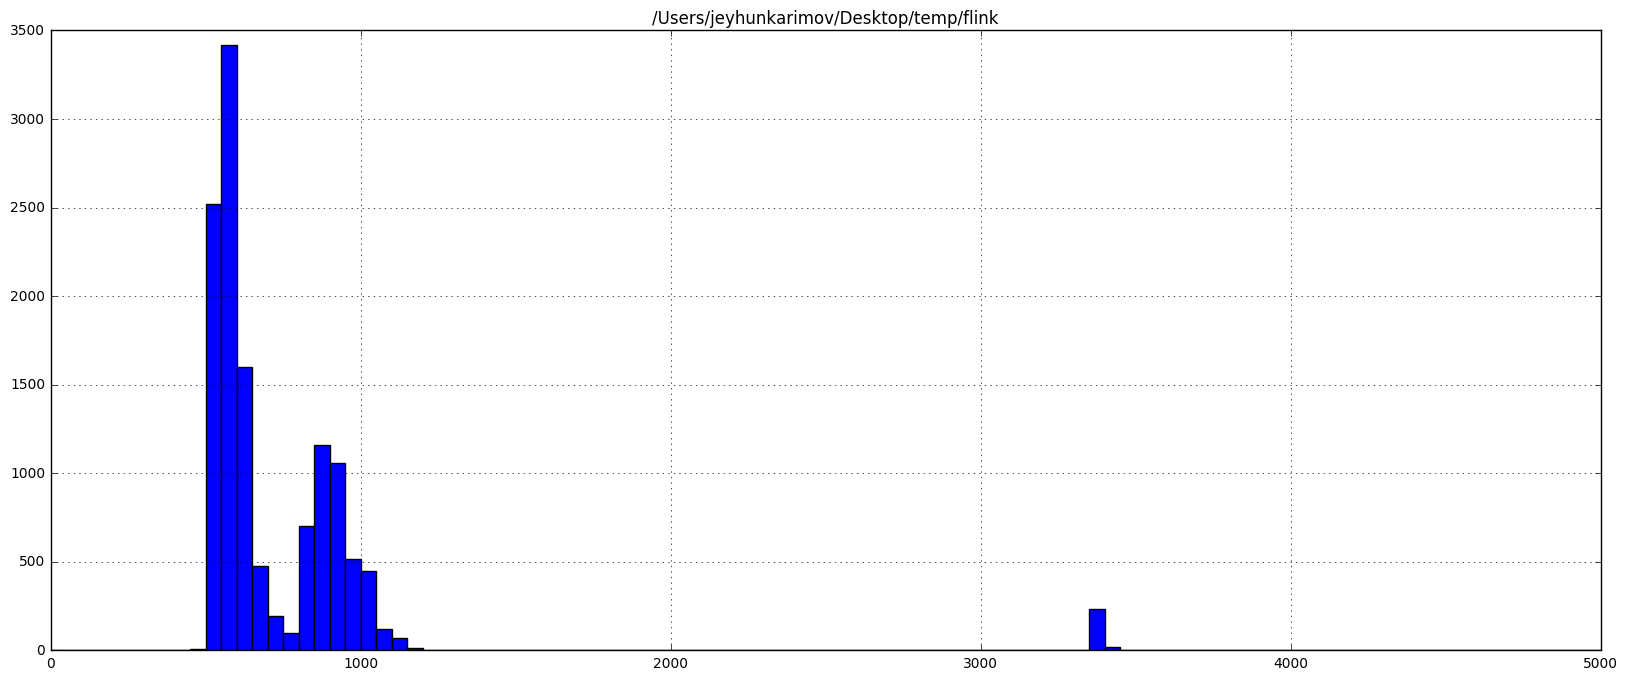

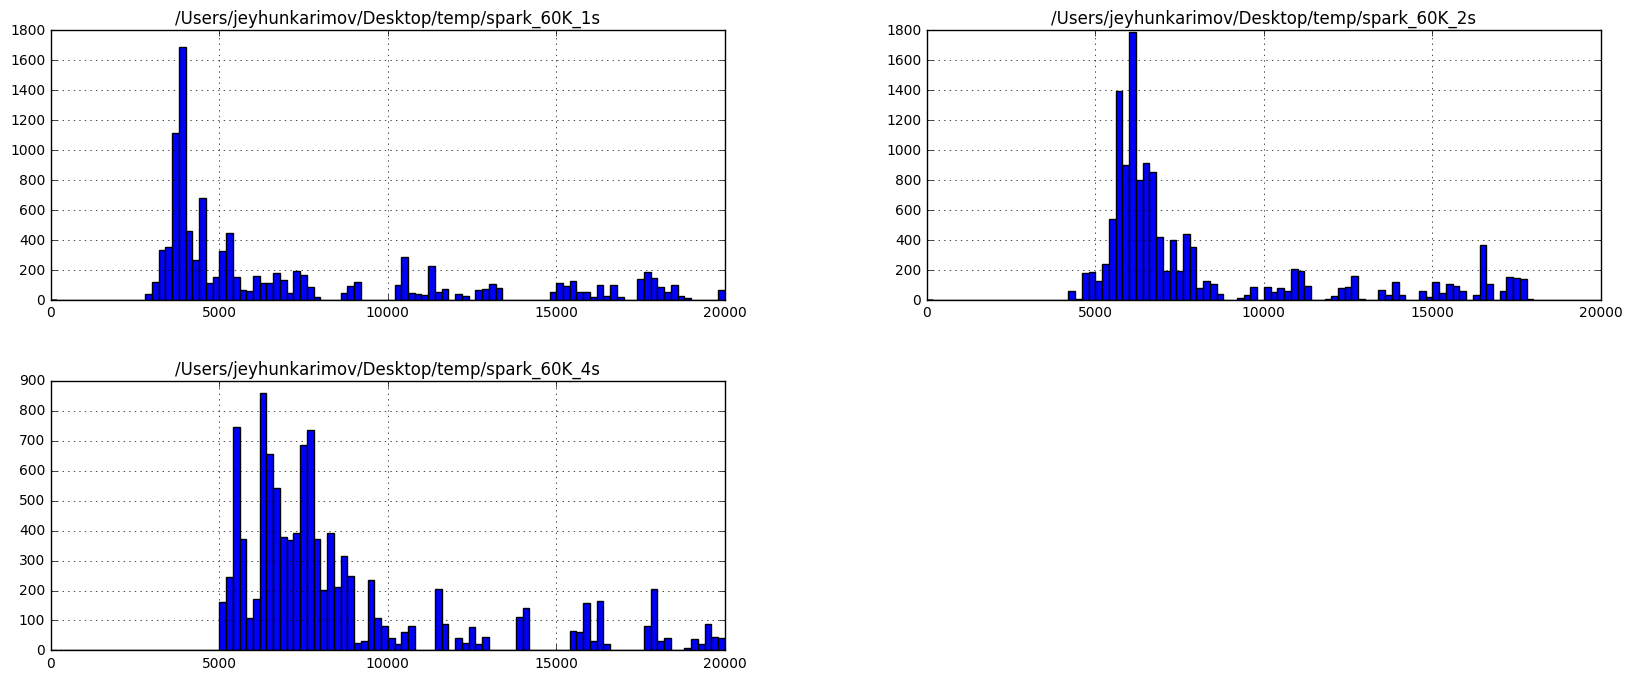

In [14]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import glob
import numpy as np

print('Flink windowed aggregation with 60K/sec data rate')

def prunDataFrame(dataframe):
    dataframe = dataframe.drop('geo', 1)
    dataframe = dataframe.drop('mx', 1)
    dataframe = dataframe.drop('mn', 1)
    dataframe = dataframe[['latency','wc']].apply(pd.to_numeric,errors='coerce')
    dataframe = dataframe.dropna()
   # dataframe = dataframe.drop('window', 1)
    return dataframe

def buildDataFrame(filePath):
    df_temp = pd.read_csv(filePath,names=['geo','latency','mx','mn','wc'])
    df_temp = prunDataFrame(df_temp)
    return df_temp

def pruneForDenseWindows(dataframe,percentage):
    pd.to_numeric(dataframe.wc)
    topWindows = dataframe.wc.quantile(percentage)
    #print(topWindows)
    dataframe = dataframe[dataframe.wc > topWindows  ]
    return dataframe


def pandasDraw(listOfFilePaths,_figsize,_range,_quantile=None):
    for fileGroup in listOfFilePaths:
        df_list = []
        for file in fileGroup:
            column_name = file.rsplit('.', 1)[0]
            temp_df = buildDataFrame(file)
            if not (_quantile is None):
                temp_df = pruneForDenseWindows(temp_df,_quantile)
            temp_df_with_cols = pd.DataFrame({column_name:temp_df.latency},
                    columns=[column_name])
            df_list.append(temp_df_with_cols)
        df_final = pd.concat(df_list)
        ax_df_final = df_final.hist(figsize=_figsize,bins=100,range=_range)
    plt.show()

figsize = (20,8)
range = [0,5000]
pandasDraw([['/Users/jeyhunkarimov/Desktop/temp/flink.csv']],
            _figsize=figsize,_range=range)

range = [0,20000]
pandasDraw([
           ['/Users/jeyhunkarimov/Desktop/temp/spark_60K_1s.csv','/Users/jeyhunkarimov/Desktop/temp/spark_60K_2s.csv','/Users/jeyhunkarimov/Desktop/temp/spark_60K_4s.csv']],
            _figsize=figsize,_range=range)

